# Data Augmentation For Object Detection

This notebook serves as general manual to using this codebase. We cover all the major augmentations, as well as ways to combine them. 

In [1]:
from data_aug.data_aug import *
#from data_aug.bbox_util import *
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import pickle as pkl
%matplotlib inline

In [2]:
import json
 
# Opening JSON file
f = open('test.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
data

{'info': {'year': 2021,
  'version': 1,
  'description': 'VIA project exported to COCO format using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
  'contributor': '',
  'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
  'date_created': 'Wed Dec 08 2021 15:51:56 GMT+0500 (Pakistan Standard Time)'},
 'images': [{'id': 1,
   'width': 800,
   'height': 533,
   'file_name': 'girl-smiling2.jpg',
   'license': 0,
   'date_captured': ''}],
 'annotations': [{'segmentation': [[392, 114, 694, 114, 694, 442, 392, 442]],
   'area': 99056,
   'bbox': [392, 114, 302, 328],
   'iscrowd': 0,
   'id': 1,
   'image_id': 1,
   'category_id': 4}],
 'licenses': [{'id': 0, 'name': 'Unknown License', 'url': ''}],
 'categories': [{'supercategory': 'type', 'id': 1, 'name': 'Bird'},
  {'supercategory': 'type', 'id': 2, 'name': 'Human'},
  {'supercategory': 'type', 'id': 3, 'name': 'Cup (object)'},
  {'supercategory': 'type', 'id': 4, 'name': 'Unknown (object)'}]}

In [3]:
bbox = np.array([data['annotations'][0]['segmentation'][0][0], data['annotations'][0]['segmentation'][0][1], data['annotations'][0]['segmentation'][0][2], data['annotations'][0]['segmentation'][0][5]])

In [4]:
img = cv2.imread("orginalimage.jpg")
bboxes = np.array([bbox, bbox])
bboxes

array([[392, 114, 694, 442],
       [392, 114, 694, 442]])

You can use the function `draw_rect` to plot the bounding boxes on an image. 

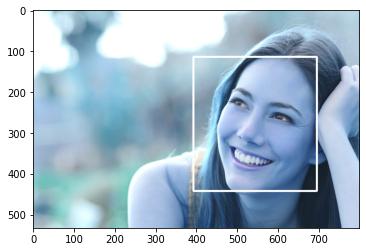

In [5]:
plotted_img = draw_rect(img, bboxes)
plt.imshow(plotted_img)
plt.show()

**Rotation**. Rotates the image. 

If the first argument is a int, then the rotating angle, in degrees, is sampled from *(- arg, arg)*. Otherwise, you can specify a tuple for this range.

In [6]:
# class RandomRotate(object):
#     """Randomly rotates an image    
    
    
#     Bounding boxes which have an area of less than 25% in the remaining in the 
#     transformed image is dropped. The resolution is maintained, and the remaining
#     area if any is filled by black color.
    
#     Parameters
#     ----------
#     angle: float or tuple(float)
#         if **float**, the image is rotated by a factor drawn 
#         randomly from a range (-`angle`, `angle`). If **tuple**,
#         the `angle` is drawn randomly from values specified by the 
#         tuple
        
#     Returns
#     -------
    
#     numpy.ndaaray
#         Rotated image in the numpy format of shape `HxWxC`
    
#     numpy.ndarray
#         Tranformed bounding box co-ordinates of the format `n x 4` where n is 
#         number of bounding boxes and 4 represents `x1,y1,x2,y2` of the box
        
#     """

#     def __init__(self, angle=10 ):
#         self.angle = angle
        
#         if type(self.angle) == tuple:
#             assert len(self.angle) == 2, "Invalid range"  
            
#         else:
#             self.angle = (-self.angle, self.angle)
            
#     def __call__(self, img, bboxes):
    
#         angle = random.uniform(*self.angle)
    
#         w,h = img.shape[1], img.shape[0]
#         cx, cy = w//2, h//2
    
#         img = rotate_im(img, angle)
    
#         corners = get_corners(bboxes)
    
#         corners = np.hstack((corners, bboxes[:,4:]))
#         global c
#         c=corners
    
    
#         corners[:,:8] = rotate_box(corners[:,:8], angle, cx, cy, h, w)
    
#         new_bbox = get_enclosing_box(corners)
        
        
    
    
#         scale_factor_x = img.shape[1] / w
    
#         scale_factor_y = img.shape[0] / h
    
#         img = cv2.resize(img, (w,h))
#         new_bbox[:,:4]=np.divide(new_bbox[:,:4], [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y] ,casting='unsafe')
#         #np.divide(new_bbox[:,:4], [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y], new_bbox[:,:4])
#         #new_bbox[:,:4] /= [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y] 
#         #new_bbox[:,:4] = np.divide ( new_bbox[:,:4] , [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y]  , out = np.zeros_like ( new_bbox[:,:4] ) , where = [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y]  != 0)
        
#         bboxes  = new_bbox
        
#         global annotations 

#         annotations = [
#         {
#       "segmentation": corners.flatten().tolist(),
#       "area": w*h,
#       "bbox": bboxes.flatten().tolist(),
#       "iscrowd": 0,
#       "id": 1,
#       "image_id": 1,
#       "category_id": 4
#         }]
        
    
#         bboxes = clip_box(bboxes, [0,0,w, h], 0.25)
    
#         return img, bboxes


In [7]:
class Rotate(object):
    """Rotates an image    
    
    
    Bounding boxes which have an area of less than 25% in the remaining in the 
    transformed image is dropped. The resolution is maintained, and the remaining
    area if any is filled by black color.
    
    Parameters
    ----------
    angle: float
        The angle by which the image is to be rotated 
        
        
    Returns
    -------
    
    numpy.ndaaray
        Rotated image in the numpy format of shape `HxWxC`
    
    numpy.ndarray
        Tranformed bounding box co-ordinates of the format `n x 4` where n is 
        number of bounding boxes and 4 represents `x1,y1,x2,y2` of the box
        
    """

    def __init__(self, angle):
        self.angle = angle
        

    def __call__(self, img, bboxes):
        """
        Args:
            img (PIL Image): Image to be flipped.

        Returns:
            PIL Image: Randomly flipped image.
            
            
        """
        
        angle = self.angle
        print(self.angle)
        
        w,h = img.shape[1], img.shape[0]
        cx, cy = w//2, h//2
        
        corners = get_corners(bboxes)
        
        corners = np.hstack((corners, bboxes[:,4:]))

        img = rotate_im(img, angle)
        global c
        c=corners
        corners[:,:8] = rotate_box(corners[:,:8], angle, cx, cy, h, w)
        
        
        
        
        new_bbox = get_enclosing_box(corners)
        
        
        scale_factor_x = img.shape[1] / w
        
        scale_factor_y = img.shape[0] / h
        
        img = cv2.resize(img, (w,h))
        
        new_bbox[:,:4] =new_bbox[:,:4]/ [scale_factor_x, scale_factor_y, scale_factor_x, scale_factor_y] 
        
        
        bboxes  = new_bbox
        global annotations
        annotations = [
        {
      "segmentation": corners.flatten().tolist(),
      "area": w*h,
      "bbox": bboxes.flatten().tolist(),
      "iscrowd": 0,
      "id": 1,
      "image_id": 1,
      "category_id": 4
        }]

        bboxes = clip_box(bboxes, [0,0,w, h], 0.25)
        
        return img, bboxes

In [8]:
for angle in range(0,100,20):
    
    img_, bboxes_ = Rotate(angle)(img.copy(), bboxes.copy())
    plotted_img = draw_rect(img_, bboxes_)
    cv2.imwrite(f"girl-smiling{angle}.jpg", plotted_img)
    
    dic1={
  "info": {
    "year": 2021,
    "version": 1,
    "description": "VIA project exported to COCO format using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)",
    "contributor": "",
    "url": "http://www.robots.ox.ac.uk/~vgg/software/via/",
    "date_created": "Wed Dec 08 2021 15:51:56 GMT+0500 (Pakistan Standard Time)"
      },
  "images": [
    {
      "id": 1,
      "width": plotted_img.shape[0],
      "height": plotted_img.shape[1],
      "file_name": f"girl-smiling{angle}.jpg",
      "license": 0,
      "date_captured": ""
        }
      ],
  "annotations": [
        {
      "segmentation": c.flatten().tolist()[0:8],
      "area": plotted_img.shape[0]*plotted_img.shape[1],
      "bbox": bboxes.flatten().tolist()[0:4],
      "iscrowd": 0,
      "id": 1,
      "image_id": 1,
      "category_id": 4
    }
      ],
  "licenses": [
    {
      "id": 0,
      "name": "Unknown License",
      "url": ""
    }
      ],
  "categories": [
    {
      "supercategory": "type",
      "id": 1,
      "name": "Bird"
        },
        {
      "supercategory": "type",
      "id": 2,
      "name": "Human"
    },
    {
      "supercategory": "type",
      "id": 3,
      "name": "Cup (object)"
    },
    {
      "supercategory": "type",
      "id": 4,
      "name": "Unknown (object)"
            }
          ]
        }
    import json
    with open(f"girl-smiling{angle}.json", 'w') as fp:
        json.dump(dic1, fp)
    cv2.imshow(f"girl-smiling{angle}", plotted_img)
    cv2.waitKey()
    cv2.destroyAllWindows()


0
20
40
60
80


In [9]:
import cv2
import numpy as np
import random
# global value
# value=random.randint(0,255)
def increase_brightness(image, active):
    
   
   
    a = active
   
    if a == 0:
        return image
        active = False
    if a == 1 :
        
       
        value=random.randint(0,255)
        
        
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        h, s, v = cv2.split(hsv)
        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] += value
        final_hsv = cv2.merge((h, s, v))
        imgbri = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        
        
        
        
        
        
        
        
        
#         cv2.imwrite(f"new{value}.jpg",img)
#         cv2.imshow('usa',img)
#         cv2.waitKey()
#         cv2.destroyAllWindows()
        return imgbri
        


In [10]:

import cv2 
def bluring(img,active): 
    a = active
   
    if a == 0:
        return img
        active = False
    if a == 1 :
        l=[(5, 5),(10,10),(8, 8)]
        a=random.choice(l)
        
    
        blurImg = cv2.blur(img,a) 
#         cv2.imwrite(f"new{a}.jpg",blurImg)
        
#         cv2.imshow('blurred image',blurImg)
  
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()
        return blurImg

In [11]:
import json
def createbox(jsonn):
    f = open(jsonn)
    data = json.load(f)
    data
    bbox = np.array([data['annotations'][0]['segmentation'][0][0], data['annotations'][0]['segmentation'][0][1], data['annotations'][0]['segmentation'][0][2], data['annotations'][0]['segmentation'][0][5]])
    bboxes = np.array([bbox, bbox])
    return bboxes

In [12]:
def lastfunction(s,e,g,jsonew,imagenew):
    aggum=[]
    ang=[]
    for angle in range(s,e,g):
        bboxes=createbox(jsonew)
        img_, bboxes_ = Rotate(angle)(imagenew.copy(), bboxes.copy())#smilling 0 angle 0
        plotted_img = draw_rect(img_, bboxes_)
        aggum.append(img_)
        ang.append(angle)
#         cv2.imwrite(f"girl-smiling{angle}.jpg", img_)
        
       

        dic1={
      "info": {
        "year": 2021,
        "version": 1,
        "description": "VIA project exported to COCO format using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)",
        "contributor": "",
        "url": "http://www.robots.ox.ac.uk/~vgg/software/via/",
        "date_created": "Wed Dec 08 2021 15:51:56 GMT+0500 (Pakistan Standard Time)"
          },
      "images": [
        {
          "id": 1,
          "width": plotted_img.shape[0],
          "height": plotted_img.shape[1],
          "file_name": f"girl-smiling{angle}.jpg",
          "license": 0,
          "date_captured": ""
            }
          ],
      "annotations": [
            {
          "segmentation": c.flatten().tolist()[0:8],
          "area": plotted_img.shape[0]*plotted_img.shape[1],
          "bbox": bboxes_.flatten().tolist()[0:4],
          "iscrowd": 0,
          "id": 1,
          "image_id": 1,
          "category_id": 4
        }
          ],
      "licenses": [
        {
          "id": 0,
          "name": "Unknown License",
          "url": ""
        }
          ],
      "categories": [
        {
          "supercategory": "type",
          "id": 1,
          "name": "Bird"
            },
            {
          "supercategory": "type",
          "id": 2,
          "name": "Human"
        },
        {
          "supercategory": "type",
          "id": 3,
          "name": "Cup (object)"
        },
        {
          "supercategory": "type",
          "id": 4,
          "name": "Unknown (object)"
                }
              ]
            }
       
       
        import json
#         for idx, val in enumerate(fin):
#         c=increase_brightness(val, brightness)
#         cv2.imwrite("image {0}.jpg".format(idx),c)
        
        
#         for i in range(len(aggum)):
        with open(f"image {angle}.json", 'w') as fp: #smillling0 _angle 10
                json.dump(dic1, fp)
        
#         i = 0
#         while(True):
#             i = i +1
#             with open("image {0}.json".format(i), 'w') as fp:
#                 json.dump(dic1, fp)
#             if i  == len(aggum):
#                 break
        
        
        
       
            
        
        
#         with open(f"girl-smiling{angle}.json", 'w') as fp:
#             json.dump(dic1, fp)
            
#             cv2.imshow("Text Detection", plotted_img)
#             cv2.waitKey()
#             cv2.destroyAllWindows()
    
             # 
    return aggum,ang
        
            
#     plt.imshow(plotted_img)
#     plt.show()

In [13]:
def newfun(folderpath,blur,brightness,s,e,g,jsonnew):
    m = []
    for filename in os.listdir(folderpath):
        img = cv2.imread(os.path.join(folderpath,filename))
        if img is not None:
            m.append(img)
    
   

    
    for i in m:
        f,h=lastfunction(s,e,g,jsonnew,i)#smilling 0
    fin=[]
    
    for ann in f:  
        b=bluring(ann,blur)
        fin.append(b)
    las=[]
    for v in fin:
        c=increase_brightness(v, brightness)
        las.append(c)
    for index, (value1, value2) in enumerate(zip(h, las)):
        
        cv2.imwrite(f"image {value1}.jpg",value2)
        
#     for gf in h:
#         cv2.imwrite(f"image {gf}.jpg",c)
    
        
    
#     for idx, val in enumerate(fin):
#         c=increase_brightness(val, brightness)
#         cv2.imwrite("image {h}.jpg".format(idx),c)
        
       
        
        
        
    
#         for i in range(len(last)):
#              cv2.imwrite("image {0}.jpg".format(i),la)
     
        
        
        
#         i = 0
#         while(True):
#             i = i +1
#             cv2.imwrite("image {0}.jpg".format(i),la)
#             if i  == len(last):
#                 break

        
    
    
    
   
       
    
        
        
        
        
newfun('/home/techverx/Downloads/Image Augmentation',1,1,0,100,20,'test.json')    

0
20
40
60
80
